# **Tarea 3**  

## Por Thomas Martínez Velásquez

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


### **Reducción de dimensión** 

Supongamos que tenemos el siguiente subconjunto de puntos en $\mathbb{R}^D$

\begin{align*}
\mathcal{D}
=
\left\lbrace 
\textbf{x}_1, \textbf{x}_2 \ldots \textbf{x}_N
\right\rbrace 
\subseteq
\mathbb{R}^D
\end{align*}

Y queremos encontrar algún subespacio $\mathcal{U}$ de dimensión $M$  en  $\mathbb{R}^D$ que mejor ajuste a la nube de puntos $\mathcal{D}$.

\begin{align*}
\mathcal{U}
=
\left\langle 
\textbf{u}_1, \textbf{u}_2\ldots \textbf{u}_M
\right\rangle 
\leq
\mathbb{R}^D
\end{align*}

Es decir, queremos encontrar el mejor $\mathcal{U}$ que este mas cerca de todos los puntos en $\mathcal{D}$. Por lo tanto, estamos interesados en resolver el siguiente problema de optimización.

\begin{align*}
\underset
{U\in\mathbb{R}^{D\times M}}
{\text{Argmin}}
\hspace{0.1 cm}
\sum_{n=1}^N
\left\Vert \textbf{x}_n - P_U (\textbf{x}_n)\right\Vert^2
\qquad \qquad
(1.1)
\end{align*}

Donde $U$ es una matriz de $\mathbb{R}^{D\times M}$ que cumple que todos sus columnas son los vectores de la base $\mathcal{U}$, y además $P_U (\textbf{x})$ es
la proyección ortogonal de $\textbf{x}$ sobre las columnas de $U$, es decir, la proyección sobre el subespacio $\mathcal{U}$

Dado que  $P_U (\textbf{x})$ es la proyección ortogonal de de 
$\textbf{x}$ sobre el subespacio $\mathcal{U}$, entonces se cumple que

\begin{align*}
P_U (\textbf{x}) 
= 
\underset
{\textbf{y}\in\mathcal{U}}
{\text{Argmin}}
\hspace{0.1 cm}
\left\Vert \textbf{x} - \textbf{y} \right\Vert^2
=
\textbf{y}^*
\qquad \qquad
(2.1)
\end{align*}

Como $\textbf{y}\in\mathcal{U}$, entonces $\textbf{y}$ es una combinación lineal
de los vectores $\textbf{u}_i$ que generan a $\mathcal{U}$, por tanto existe un vector $\textbf{w}\in\mathbb{R}^M$ tal que 
$$\textbf{y} = U\textbf{w}$$
Así, el problema (2,1) es equivalente al problema

\begin{align*}
\underset
{\textbf{w}\in\mathbb{R}^M}
{\text{Argmin}}
\hspace{0.1 cm}
\left\Vert \textbf{x} - U\textbf{w} \right\Vert^2
\qquad \qquad
(2.2)
\end{align*}

Para resolver el problema (2,2) definamos 

\begin{align*}
h(\textbf{w}) 
&=
\left\Vert \textbf{x} - U\textbf{w} \right\Vert^2
\\
&=
(\textbf{x} - U\textbf{w})^t(\textbf{x} - U\textbf{w})
\\
&=
\left\Vert \textbf{x} \right\Vert ^2
-
2\textbf{x}^tU\textbf{w}
+
\textbf{w}^tU^tU\textbf{w}
\end{align*}
Además notemos que
\begin{align*}
\nabla h(\textbf{w})
&=
-2U^t\textbf{x} + 2 U^tU\textbf{w}
\end{align*}

Por lo tanto, si $\textbf{w}^*$ es una solución de (2.2) entonces se cumple que

\begin{align*}
\textbf{0} 
= 
\nabla h(\textbf{w}^*)
=
-2U^t\textbf{x} + 2 U^tU\textbf{w}^*
\end{align*}

Y por tanto

\begin{align*}
\textbf{w}^* 
=
(U^tU)^{-1}U^t\textbf{x} 
\end{align*}

Como la Hessiana es el jacobiano del gradiente, entonces notemos que la Hessiana de $h(\textbf{w})$ es de la forma 

\begin{align*}
H_h(\textbf{w}) = 2U^tU
\end{align*}


y por lo tanto cumple que

\begin{align*}
\textbf{w}^t H_h(\textbf{w}) \textbf{w}
=
\textbf{w}^t U^tU \textbf{w}
=
\left\Vert U\textbf{w} \right\Vert^2 > 0
\qquad \qquad 
\forall \textbf{w} \neq \textbf{0}
\end{align*}

Dado que $U$ es full rank. Por lo tanto la Hessiana de $h$ es definido positivo estricto, lo que implica que la solución $\textbf{w}^*$ existe y es única

Por lo tanto, una solución de (2,1) esta dada por 

\begin{align*}
P_U(\textbf{x}) = \textbf{y}^* = U\textbf{w}^*
= U(U^tU)^{-1}U^t\textbf{x} 
\end{align*}

Por lo tanto solucionar el problema (1,1) es equivalente a solucionar el siguiente problema

\begin{align*}
\underset
{U\in\mathbb{R}^{D\times M}}
{\text{Argmin}}
\hspace{0.1 cm}
\sum_{n=1}^N
\left\Vert 
\textbf{x}_n 
- 
U(U^tU)^{-1}U^t\textbf{x}_n
\right\Vert^2
\qquad \qquad
(1.2)
\end{align*}

Ahora bien, notemos que el problema (1,2) involucra inversas de matrices lo cual es algo no deseado. Para solucionar esto la idea es condicionar nuestra búsqueda de $U$
solo en matrices ortonormales, es decir en matrices que cumplen 

$$
U^tU = I_M
$$

Donde $I_M$ es la matriz identidad de $\mathbb{R}^M$. Por lo tanto, el problema (1,2) es equivalente a solucionar el siguiente problema de obtimización con restricción

\begin{align*}
\left\{ \begin{array}{lcc} 
\underset
{U\in\mathbb{R}^{D\times M}}
{\text{Argmin}}
\hspace{0.1 cm}
\sum_{n=1}^N
\left\Vert 
\textbf{x}_n 
- 
UU^t\textbf{x}_n
\right\Vert^2
\\ \\ 
U^tU = I_M
\end{array} \right.
\qquad \qquad
(1.3)
\end{align*}

Dado que $U^tU=I_M$ esto también implica que

\begin{align*}
\left\Vert 
\textbf{x}_n 
- 
UU^t\textbf{x}_n
\right\Vert^2
&=
\left\Vert \textbf{x}_n \right\Vert^2
-2 \textbf{x}_n^t UU^t \textbf{x}_n
+ (UU^t\textbf{x}_n)^t(UU^t\textbf{x}_n)
\\
&=
\left\Vert \textbf{x}_n \right\Vert^2
-2 \textbf{x}_n^t UU^t \textbf{x}_n
+ \textbf{x}_n^tU(U^tU)U^t\textbf{x}_n
\\
&=
\left\Vert \textbf{x}_n \right\Vert^2
-2 \textbf{x}_n^t UU^t \textbf{x}_n
+ \textbf{x}_n^tUU^t\textbf{x}_n
\\
&=
\left\Vert \textbf{x}_n \right\Vert^2
- \textbf{x}_n^t UU^t \textbf{x}_n
\end{align*}

Por lo tanto el problema (1,3) es equivalente al siguiente problema

\begin{align*}
\left\{ \begin{array}{lcc} 
\underset
{U\in\mathbb{R}^{D\times M}}
{\text{Argmin}}
\hspace{0.1 cm}
\sum_{n=1}^N
\left\lbrace 
\left\Vert \textbf{x}_n \right\Vert^2
- \textbf{x}_n^t UU^t \textbf{x}_n
\right\rbrace 
\\ \\ 
U^tU - I_M= \textbf{0}
\end{array} \right.
\qquad \qquad
(1.4)
\end{align*}

Donde en el problema (1,4) la función objetivo y la restricciones las vamos a denotar respectivamente como 

\begin{align*}
&f(U) = 
\sum_{n=1}^N
\left\lbrace 
\left\Vert \textbf{x}_n \right\Vert^2
- \textbf{x}_n^t UU^t \textbf{x}_n
\right\rbrace 
&
\qquad \qquad
&
C(U) = U^tU-I_M
&
\end{align*}

Donde notemos que 
\begin{align*}
&
f \hspace{0.1 cm} : \hspace{0.1 cm}
\mathbb{R}^{D\times M} \longrightarrow \mathbb{R}
&
\qquad \qquad
&
C \hspace{0.1 cm} : \hspace{0.1 cm}
\mathbb{R}^{D\times M} \longrightarrow \mathbb{R}^{M\times M}
&
\end{align*}
Notemos que si $\textbf{u}_i,\textbf{u}_j\in\mathcal{U}$ entonces claramente se cumple que $\textbf{u}_j^t\textbf{u}_i = \textbf{u}_i^t\textbf{u}_j = 0 $ para 
$i\neq j$ (dado que estamos suponiendo que $U$ es ortonormal). Por lo tanto en 
la matriz $C(U)$ van a existir $\frac{1}{2}M(M+1)$ restricciones que NO son redundantes, que corresponden a la matriz triangular superior o inferior de $C(U)$.
En esta tarea trabajaremos con la superior. Por lo tanto en la practica $C$ será una funcion de $\mathbb{R}^{D\times M}$ a $\mathbb{R}^{\frac{1}{2}M\times (M+1)}$

Ahora bien, con la librería de python random se ha generado una nube de puntos 
$\mathcal{D}$
que luego se han guardado en el archivo `datos.csv`, así, en python, nuestra nube de puntos $\mathcal{D}$ va a estar referenciada por la variable `Datos`

In [2]:
Datos = np.loadtxt('datos.csv', delimiter=',')
Dataf_1 = pd.DataFrame(Datos.T, columns=['eje_x', 'eje_y', 'eje_z', ])
Dataf_1.T


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
eje_x,1.702460,3.153889,3.233344,1.767296,1.342186,0.204805,-0.284140,0.680704,0.230127,1.531317,...,-1.837654,-2.870231,-2.494967,-4.143383,-2.535076,-2.862712,-3.463384,-2.581223,-3.331756,-3.484672
eje_y,0.804465,0.668857,2.085317,0.344628,-1.705787,-0.432360,-0.997299,1.095499,1.156868,0.150569,...,-2.876897,-5.810847,-0.909942,-3.709592,-3.749194,-1.630129,-3.554525,-2.630812,-5.001636,-4.134591
eje_z,1.915970,0.668880,0.336063,0.341359,-1.439402,1.444413,3.072740,-1.014898,-0.627751,0.587483,...,-3.422860,-3.310663,-3.732945,-1.705426,-2.274130,-3.992853,-5.069723,-2.992768,-3.594882,-3.228092


Notemos que nuestro conjunto $\mathcal{D}$ es un conjunto de `N=35` puntos con de dimensión `D=3`, donde supongamos que queremos hallar un subespacio $\mathcal{U}$
de $\mathbb{R}^3$ de dimensión `M=2` que mejor ajuste a la nube de puntos 
$\mathcal{D}$

In [3]:
N = Datos.shape[1]
D = Datos.shape[0]
M = 2

Grafiquemos nuestra  nube de puntos $\mathcal{D}$

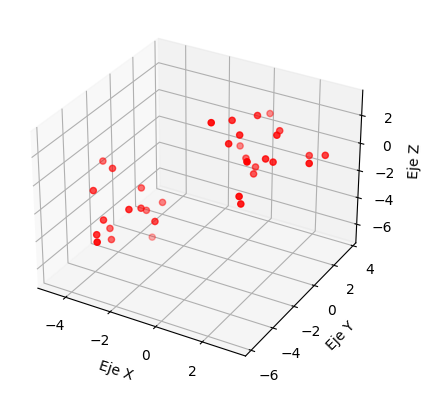

In [10]:
def grafica1(datos):
    x = Datos[0,:]
    y = Datos[1,:]
    z = Datos[2,:]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z, c='r', marker='o')

    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')

    plt.show()

grafica1(Datos)

Dado que estamos trabajando con funciones que dependen de la matriz $U$, para simplificar notación, he decidido crear la función  `CrearDiccionarios`. Esta creará un diccionartio que actuará como sub-rutina en varias funciones en python que voy a definir mas adelante.

In [4]:
def CrearDiccionarios(D,M):
    w = D*M
    d2 = [0 for _ in range(w)]
    l = 0
    for j in range(M):
        for i in range(D):
            d2[l] = ((i,j,'u'), l)
            l += 1
    t = int(0.5*M*(M+1))
    d4 = [0 for _ in range(t)]
    s = 0
    for r in range(M):
        for k in range(r+1):
            d4[s] = ((k,r,'l'), l)
            s += 1
            l += 1
    D2 = d2 + d4
    return dict(D2)

indicesMV = CrearDiccionarios(D,M)

Así, para solucionar el problema (1,4) optaremos por el método **local SPQ**. Concretamente, de (1,4) tenemos que la función lagrangeana estará dada por

\begin{align*}
\mathcal{L}(
U, \lambda
)
=
f(U) - \lambda^t C(U)
\end{align*}

En python, nuestra función objetivo $f(U)$ estará dada por `funcionObj`

In [5]:
def funcionObj(U):
    suma1 = 0
    for n in range(N):
        norma = np.linalg.norm(Datos[:,n])
        suma2 = 0
        for i in range(D):
            for j in range(D):
                for l in range(M):
                    ind1 = indicesMV[(i,l,'u')]
                    ind2 = indicesMV[(j,l,'u')]
                    suma2 += U[ind1]*U[ind2]*Datos[j,n]*Datos[i,n]
        suma1 += norma**2 - suma2
    return suma1

Como $C(U) = U^tU - I_M$ se puede entender como un vector de $\mathbb{R}^{M\times M}$
(o en la practica $\mathbb{R}^{\frac{1}{2}M\times (M+1)}$) entonces entrada por entrada $C$ va a estar dado por 

\begin{align*}
C_{kr}(U) = 
\sum_{\ell=1}^D \left\lbrace  u_{\ell k} u_{\ell r} \right\rbrace - \delta_{kr}
\qquad \qquad
1\leq k,r \leq M
\end{align*}

Donde $u_{\ell k}$ son las entradas de la matriz $U$ y $\delta_{kr}$ es la  delta de Dirac. En python $C_{kr}(U)$ estará dado por `constraints` y la delta de Dirac
estará dada por `delta` 

In [6]:
def delta(a,b):
    if a == b:
        return 1
    return 0

def constraints(U, k, r):
    suma = 0
    for l in range(D):
        ind1 = indicesMV[(l, k, 'u')]
        ind2 = indicesMV[(l, r, 'u')]
        suma += U[ind1]*U[ind2]
    return suma - delta(k,r)

Por otra parte, vamos a denotar $D_C(U)$ al jacobiano de las restricciones, donde notemos que

\begin{align*}
&
D_C^t(U) 
\hspace{0.1 cm} : \hspace{0.1 cm}
\mathbb{R}^{M\times M}  \longrightarrow  \mathbb{R}^{D\times M}
&
\\
&
D_C^t(U) = 
\begin{bmatrix}
\nabla C_{11}(U) & \nabla C_{21}(U) & \ldots & \nabla C_{MM}(U)
\end{bmatrix}
&
\end{align*}

Aunque en la practica ahora vamos a ver que $D_C^t(U)$ solo tiene 
$\frac{1}{2}M(M+1)$ columnas.


Luego, para encontrar la gradiente de cada restricción $C_{kr}$ tenemos que computar las
$D\times M$ derivadas parciales con respecto a $U$ de $C_{kr}$, estas estarán dadas por 

\begin{align*}
\dfrac{\partial}{\partial u_{ij}} C_{kr}(U)
&=
\dfrac{\partial}{\partial u_{ij}}
\left\lbrace 
\sum_{\ell=1}^D \left\lbrace  u_{\ell k} u_{\ell r} \right\rbrace - \delta_{kr}
\right\rbrace
\\
&=
\dfrac{\partial}{\partial u_{ij}} 
\left\lbrace 
u_{ik}
\right\rbrace 
u_{ir}
+
u_{ik}
\dfrac{\partial}{\partial u_{ij}} 
\left\lbrace 
u_{ir}
\right\rbrace 
\\
&=
\nabla C_{kr}(U)_{ij}
\end{align*}

Donde $1\leq i \leq D$ y $1 \leq j \leq M$, y donde $\nabla C_{kr}(U)_{ij}$ es
la gradiente en la entrada $ij$ visto como vector.


Sea $\lambda\in\mathbb{R}^{\frac{1}{2}M(M+1)}$ un multiplicador de Lagrange y solo tengamos en cuenta 
las $\frac{1}{2}M(M+1)$ columnas de $D_C^t(U)$ que no son redundantes, por tanto

\begin{align*}
D_C^t(U)\lambda 
=
\sum_{r=1}^M \sum_{k=1}^r 
\nabla C_{kr}(U)\lambda_{kr}
\end{align*}
Es un vector en $\mathbb{R}^{D\times M}$. Este vector, componente a componente, estará dado por 
\begin{align*}
(D_C^t(U)\lambda)_{ij}
&=
\sum_{r=1}^M \sum_{k=1}^r 
\nabla C_{kr}(U)_{ij}\lambda_{kr}
\\
&=
\sum_{r=1}^M \sum_{k=1}^r 
\left( 
\dfrac{\partial}{\partial u_{ij}} 
\left\lbrace 
u_{ik}
\right\rbrace 
u_{ir}
+
u_{ik}
\dfrac{\partial}{\partial u_{ij}} 
\left\lbrace 
u_{ir}
\right\rbrace 
\right) 
\lambda_{kr}
\\
&=
\sum_{k=1}^M \sum_{r=K}^M 
\left( 
\dfrac{\partial}{\partial u_{ij}} 
\left\lbrace 
u_{ik}
\right\rbrace 
u_{ir}
\right)\lambda_{kr}
+
\sum_{r=1}^M \sum_{k=1}^r 
\left( 
u_{ik}
\dfrac{\partial}{\partial u_{ij}} 
\left\lbrace 
u_{ir}
\right\rbrace
\right) \lambda_{kr}
\\
&=
\sum_{r=k}^M u_{ir} \lambda_{jr}
+
\sum_{k=1}^r u_{ik} \lambda_{kj}
\end{align*}

Esto nos facilitará mas adelante definir en python el vector $D_C^t(U)\lambda$

Ahora bien, para encontrar $\nabla\mathcal{L}$ solo nos falta encontrar el gradiente de $f$. Para esto, recordemos que

\begin{align*}
f(U) = 
\sum_{n=1}^N
\left\lbrace 
\left\Vert \textbf{x}_n \right\Vert^2
- \textbf{x}_n^t UU^t \textbf{x}_n
\right\rbrace
\end{align*}
Y después de hacer algunas cuentas un poco largas nos daremos cuenta que

\begin{align*}
\nabla f(U)_{ij}
=
\dfrac{\partial}{\partial u_{ij}} f(U)
=
-2 \sum_{n=1}^N \sum_{\ell=1}^D u_{\ell j} x_{\ell n} x_{in}
\end{align*}

Por lo tanto, con todo lo anterior, la gradiente del Lagrangenao $\nabla\mathcal{L}$
estará dada componente a componente por

\begin{align*}
\nabla\mathcal{L}(U, \lambda)_{ij}
&=
(\nabla f(U) - D_C^t(U)\lambda)_{ij}
\\
&=
-2 \sum_{n=1}^N \sum_{\ell=1}^D u_{\ell j} x_{\ell n} x_{in}
-
\left( 
\sum_{r=k}^M u_{ir} \lambda_{jr}
+
\sum_{k=1}^r u_{ik} \lambda_{kj}
\right) 
\end{align*}

En python, esto estará dado por `gradLagrangian_U`

In [7]:
def gradLagrangian_U(Ulam, i, j):
    suma1 = 0
    for n in range(N):
        for l in range(D):
            ind = indicesMV[(l,j,'u')]
            suma1 += Ulam[ind]*Datos[l,n]*Datos[i,n]
    suma2 = 0
    for r in range(j,M):
        ind2 = indicesMV[(i,r,'u')]
        lam2 = indicesMV[(j,r,'l')]
        suma2 += Ulam[ind2]*Ulam[lam2]
    suma3 = 0
    for k in range(j+1):
        ind3 = indicesMV[(i,k,'u')]
        lam3 = indicesMV[(k,j,'l')]
        suma3 += Ulam[ind3]*Ulam[lam3]
    return -2*suma1 -(suma2 + suma3)

Definamos con la función restricción $C(U)$ y la gradiende del Lagrangeano 
$\nabla\mathcal{L}(U,\lambda)$ la siguiente función 

\begin{align*}
F(U,\lambda)
=
\begin{bmatrix}
\nabla f(U) - D_C^t(U)\lambda \\
C(U)
\end{bmatrix}
\end{align*}

Donde 

\begin{align*}
F \hspace{0.1 cm} : \hspace{0.1 cm}
\mathbb{R}^{D\times M + \frac{1}{2}M(M+1)}
\longrightarrow
\mathbb{R}^{D\times M + \frac{1}{2}M(M+1)}
\end{align*}

Dado que estamos eligiendo las entradas de $C$ y las columnas de $D_C^t$ que no son redundantes. en python, la funcion $F$ va a estar dado por `F` 

In [8]:
def F(Ulam):
    w = int((0.5)*M*(M+1))
    a = np.array([0 for _ in range(D*M + w)])
    row = 0
    for j in range(M):
        for i in range(D):
            a[row] = gradLagrangian_U(Ulam, i, j)
            row += 1
    for r in range(M):
        for k in range(r+1):
            a[row] = constraints(Ulam,k,r)
            row += 1
    return a

Notemos entonces, que si $(U^*,\lambda^*)$ con $\lambda^*\geq 0$  es un vector que cumple que

$$
F(U^*,\lambda^*) = \textbf{0} \qquad\qquad (3)
$$

Entonces por KKT se sigue que $U^*$ sería la solución de nuestro problema, es decir,
$U^*$ visto como matriz, sus columnas serían la base del sub espacio que estamos buscando que mejor se ajusta a la nube de puntos $\mathcal{D}$. Por lo tanto nuestro 
objetivo ahora es solucionar (3).

Para esto, vamos a utilizar el método de Newtow lo que implica encontrar el jacobiano de $F$, en python, este jacobiano estará dado por `DF` 

In [9]:
def Dconstraints_entradas(U, k, r, p , q):
    suma1 = 0
    if q == k:
        ind1 = indicesMV[(p,r,'u')]
        suma1 += U[ind1]
    suma2 = 0
    if q == r:
        ind2 = indicesMV[(p,k,'u')]
        suma2 += U[ind2]
    return suma1 + suma2

def DF(Ulam):
    w = int((0.5)*M*(M+1))
    A = np.zeros((D*M+w, D*M+w))
    row = 0
    for j in range(M):
        for i in range(D):
            col = 0
            for q in range(M):
                for p in range(D):
                    suma1 = 0
                    if q == j:
                        for n in range(N):
                            suma1 += Datos[p,n]*Datos[i,n]
                    suma2 = 0
                    if (p == i) and (q <= j):
                        lam1 = indicesMV[(q,j,'l')]
                        suma2 = Ulam[lam1]
                    suma3 = 0
                    if (p == i) and (q >= j):
                        lam2 = indicesMV[(j,q,'l')]
                        suma3 = Ulam[lam2]
                    suma = suma2 + suma3
                    A[row,col] = -2*suma1 - suma
                    col += 1
            row += 1    
    for r in range(M):
        for k in range(r+1):
            col = 0
            for q in range(M):
                for p in range(D):
                    a = Dconstraints_entradas(Ulam,k,r,p,q)
                    A[row, col] = a
                    A[col,row] = -a
                    col += 1
            row += 1   
    return A

Aquí, la función `Dconstraints_entradas` actúa como una sub rutina que me ayuda a definir a `DF`. 

La siguiente funcion `newthonMethod` es una simple implementación de el método de Newton para resolver el problema (3). Esta función tiene como imput el punto inicial sobre el cual se va a aplicar iterativamente el método de Newton. La función en cada paso irá imprimendo el valor de $F$ y la funión objetivo $f$ y al final retornará el vector $(U^*, \lambda^*)$ solución

In [13]:
def newthonMethod(Y_inicial):
    epsilon = 0.001
    k = 100
    Y = Y_inicial
    contador = 1
    while (contador < k) and (np.linalg.norm(F(Y)) > epsilon):
        p = np.linalg.solve(DF(Y), -F(Y))
        Y = Y+p
        print(F(Y))
        print(funcionObj(Y))
        print()
        contador += 1
    return Y

In [14]:
Y_inicial = np.array([1,0,0,0,1,0,1,1,1])
Ulamb_Solucion = newthonMethod(Y_inicial)

[   0    0 -205    0    0 -222    0    0    0]
434.5251297934659

[24 13 30 27 15 33  0  0  0]
452.8259417544477

[-10  15   0   4   5  -8   0   0   0]
403.2967735131731

[-2  2  0  0  1 -2  0  0  0]
394.0372041282965

[0 0 0 0 0 0 0 0 0]
393.7982382545002



Donde notemos que a lo largo de las iteraciones el valor de la función objetivo ha estado decendiendo casi siempre y además en la ultima iteración del método de newton hemos llegado a $F(U,\lambda) = 0$ por lo tanto el vector 

In [16]:
print(Ulamb_Solucion)

[  0.86384719   0.26450545  -1.07425245  -0.43107449   1.13139483
  -0.64090577 -61.42740874 -28.49097611 -60.36735294]


es una solución de nuestro problema inicial.